In [1]:
import numpy as np   
import pandas as pd 

In [2]:
data=pd.read_csv("Fraud.csv")
data.head() 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.isnull().sum() #check for  null values 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
data=data.drop_duplicates() #drop duplicates values
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data=data.drop(columns=['nameOrig','nameDest'],axis=1) #removing unwanted columns
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#import dependencies

In [21]:
le=LabelEncoder()
data['type']=le.fit_transform(data['type']) #label encoding categorical column
data.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


<Axes: >

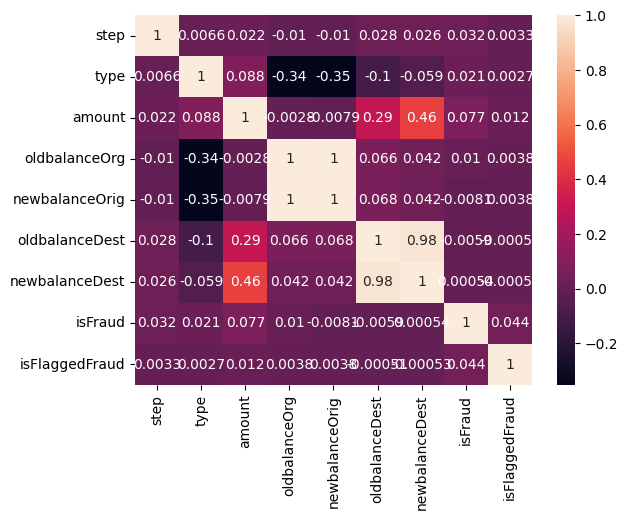

In [8]:
corrmat=data.corr()
top_corr_features=corrmat.index
sns.heatmap(data[top_corr_features].corr(),annot=True) #highly correlated data

<Axes: >

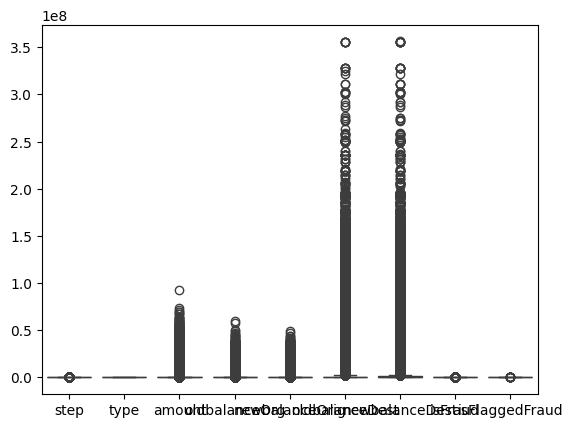

In [9]:
sns.boxplot(data) #check for outliers

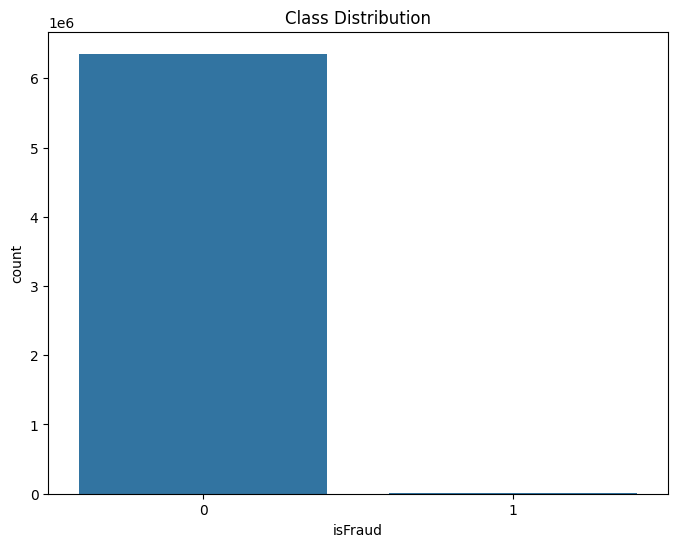

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data)
plt.title('Class Distribution')
plt.show()

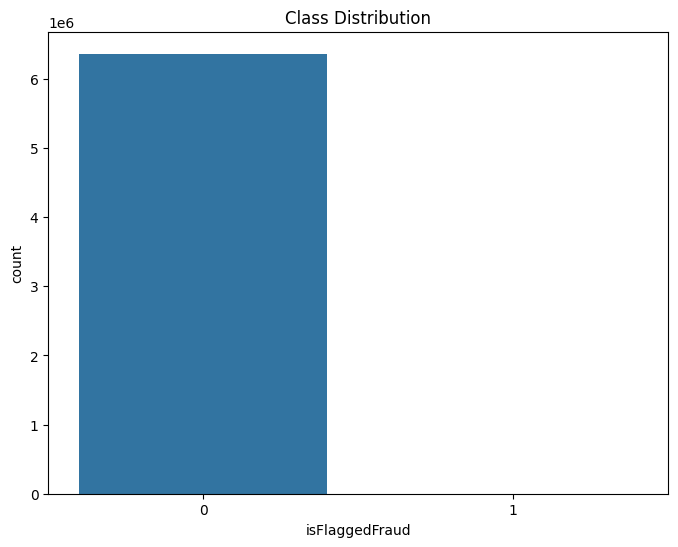

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFlaggedFraud', data=data)
plt.title('Class Distribution')
plt.show()

In [12]:
x=data.drop(columns=['isFraud','isFlaggedFraud'],axis=1)
y=data['isFraud']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
x_train,y_train = sm.fit_resample(x_train, y_train)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
x_train = sc.fit_transform(x_train)
# Apply the same transformation to the testing data
x_test = sc.transform(x_test)


In [17]:
# Print the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution after applying SMOTE:
isFraud
0    5083503
1    5083503
Name: count, dtype: int64


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_pred)

array([[1270141,     763],
       [     78,    1542]])

In [22]:
print(accuracy_score(y_test,y_pred))

0.9993391087319374
